# Using Python to perform data analytics
## Sources
https://www.ers.usda.gov/data-products/livestock-and-meat-domestic-data/

## Report
Livestock has been selectively bred since the early 1900s in order to improve farming efficiency. This data shows the effects of this breeding on animal weights. Chickens and Turkey's with the shortest gestation period have been affected the worst, doubling their weight in a 60 year period. In 2024 the increase in weights of Cattle, Chicken, Turkeys and Pigs is not slowing down with a constant increase each year.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from datetime import date
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

In [3]:
sns.set_theme()
warnings.filterwarnings('ignore', 'use_inf_as_na')

In [4]:
us_data_file = r"USMeatStatsFull.xlsx"

us_weight_data_raw = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterWeights-Full",
    header=[1,2],
    index_col=0
)

us_slaughter_count_raw = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterCounts-Full",
    header=[1,2],
    index_col=0
)

us_weight_data_raw

Commercial average live                                \
Date                      Cattle Calves   Hogs Sheep and lambs   
Jan-2024                  1389.0  294.0  292.0           121.0   
Dec-2023                  1401.0  293.0  291.0           115.0   
Nov-2023                  1387.0  301.0  289.0           116.0   
Oct-2023                  1374.0  308.0  285.0           115.0   
Sep-2023                  1362.0  287.0  281.0           116.0   
...                          ...    ...    ...             ...   
May-1921                     NaN    NaN    NaN             NaN   
Apr-1921                     NaN    NaN    NaN             NaN   
Mar-1921                     NaN    NaN    NaN             NaN   
Feb-1921                     NaN    NaN    NaN             NaN   
Jan-1921                     NaN    NaN    NaN             NaN   

         Federally inspected average live                                \
Date                               Cattle Calves   Hogs Sheep and lambs   
Jan-2024                           1392.0  292.0  292.0           124.0   
Dec-2023                           1404.0  292.0  291.0           117.0   
Nov-2023                           1390.0  300.0  289.0           118.0   
Oct-2023                           1378.0  307.0  285.0           118.0   
Sep-2023                           1365.0  285.0  281.0           118.0   
...                                   ...    ...    ...             ...   
May-1921                           1006.0  148.0  220.0            78.0   
Apr-1921                           1013.0  137.0  226.0            85.0   
Mar-1921                           1007.0  145.0  227.0            88.0   
Feb-1921                            993.0  156.0  228.0            88.0   
Jan-1921                            981.0  170.0  227.0            88.0   

                                         Federally inspected average dressed  \
Date     Broilers Other chickens Turkeys                              Cattle   
Jan-2024     6.58           6.95   33.35                               840.0   
Dec-2023     6.61           6.81   31.56                               849.0   
Nov-2023     6.61           6.92   30.55                               840.0   
Oct-2023     6.70           6.89   30.57                               833.0   
Sep-2023     6.61           7.10   31.55                               828.0   
...           ...            ...     ...                                 ...   
May-1921      NaN            NaN     NaN                               562.0   
Apr-1921      NaN            NaN     NaN                               538.0   
Mar-1921      NaN            NaN     NaN                               551.0   
Feb-1921      NaN            NaN     NaN                               534.0   
Jan-1921      NaN            NaN     NaN                               523.0   

                                                                              
Date     Steers Heifers   Cows Bulls and stags Calves   Hogs Sheep and lambs  
Jan-2024  921.0   836.0  644.0           868.0  172.0  218.0            63.0  
Dec-2023  941.0   851.0  628.0           862.0  172.0  217.0            60.0  
Nov-2023  935.0   851.0  619.0           851.0  178.0  215.0            60.0  
Oct-2023  926.0   840.0  613.0           858.0  182.0  212.0            60.0  
Sep-2023  918.0   827.0  613.0           874.0  168.0  209.0            60.0  
...         ...     ...    ...             ...    ...    ...             ...  
May-1921    NaN     NaN    NaN             NaN   85.0  171.0            38.0  
Apr-1921    NaN     NaN    NaN             NaN   81.0  174.0            40.0  
Mar-1921    NaN     NaN    NaN             NaN   87.0  173.0            42.0  
Feb-1921    NaN     NaN    NaN             NaN   94.0  176.0            41.0  
Jan-1921    NaN     NaN    NaN             NaN   97.0  171.0            41.0  

[1237 rows x 19 columns]

In [5]:
us_slaughter_count_raw

Type     Commercial                                                   \
             Cattle       Steers     Heifers   Beef cows  Dairy cows   
Jan-2024     2730.4  1310.649047  849.690945  282.992620  254.876723   
Dec-2023     2593.5  1218.806615  811.181026  297.019244  228.640713   
Nov-2023     2729.9  1231.219211  872.431772  347.180808  233.863436   
Oct-2023     2826.0  1300.938180  888.326047  337.666004  248.016548   
Sep-2023     2610.6  1230.443355  804.250004  281.273334  245.272795   
...             ...          ...         ...         ...         ...   
May-1907        NaN          NaN         NaN         NaN         NaN   
Apr-1907        NaN          NaN         NaN         NaN         NaN   
Mar-1907        NaN          NaN         NaN         NaN         NaN   
Feb-1907        NaN          NaN         NaN         NaN         NaN   
Jan-1907        NaN          NaN         NaN         NaN         NaN   

Type                                                                    ...  \
         Bulls and stags Calves     Hogs Barrows and gilts        Sows  ...   
Jan-2024       32.190665   22.6  11368.7      11056.976933  287.311625  ...   
Dec-2023       37.852401   22.5  10825.5      10546.820579  255.372418  ...   
Nov-2023       45.204774   24.2  11138.9      10854.763874  259.210141  ...   
Oct-2023       51.053221   23.1  11430.4      11126.604332  277.348048  ...   
Sep-2023       49.360513   21.7  10486.5      10199.575977  260.383048  ...   
...                  ...    ...      ...               ...         ...  ...   
May-1907             NaN    NaN      NaN               NaN         NaN  ...   
Apr-1907             NaN    NaN      NaN               NaN         NaN  ...   
Mar-1907             NaN    NaN      NaN               NaN         NaN  ...   
Feb-1907             NaN    NaN      NaN               NaN         NaN  ...   
Jan-1907             NaN    NaN      NaN               NaN         NaN  ...   

Type     Federally inspected                                           \
                        Hogs Barrows and gilts   Sows Boars and stags   
Jan-2024             11316.8           11006.5  286.0            24.3   
Dec-2023             10775.8           10498.5  254.2            23.2   
Nov-2023             11082.6           10799.8  257.9            24.8   
Oct-2023             11366.6           11064.6  275.8            26.3   
Sep-2023             10430.8           10145.5  259.0            26.4   
...                      ...               ...    ...             ...   
May-1907              3317.0               NaN    NaN             NaN   
Apr-1907              2667.0               NaN    NaN             NaN   
Mar-1907              2665.0               NaN    NaN             NaN   
Feb-1907              2921.0               NaN    NaN             NaN   
Jan-1907              3410.0               NaN    NaN             NaN   

Type                                                                 \
         Sheep and lambs Lambs and yearlings Mature sheep  Broilers   
Jan-2024           152.4               142.7          9.7  815293.0   
Dec-2023           159.7               149.5         10.2  723802.0   
Nov-2023           168.4               158.0         10.4  761801.0   
Oct-2023           163.3               152.9         10.4  824609.0   
Sep-2023           143.8               133.2         10.6  761055.0   
...                  ...                 ...          ...       ...   
May-1907           769.0                 NaN          NaN       NaN   
Apr-1907           861.0                 NaN          NaN       NaN   
Mar-1907           842.0                 NaN          NaN       NaN   
Feb-1907           837.0                 NaN          NaN       NaN   
Jan-1907          1017.0                 NaN          NaN       NaN   

Type                              
         Other chickens  Turkeys  
Jan-2024         9783.0  16527.0  
Dec-2023         8800.0  15714.0  
Nov-2023         9260

In [6]:
us_weight_data = us_weight_data_raw.copy()
us_slaughter_count = us_slaughter_count_raw.copy()
us_weight_data.columns.set_names(["Weight_type", "Animal"], inplace=True)

us_weight_data.index = pd.to_datetime(us_weight_data.index, format="%b-%Y")
us_slaughter_count.index = pd.to_datetime(us_slaughter_count.index, format="%b-%Y")

us_slaughter_count.drop(("Federally inspected", "Other chickens"), axis=1, inplace=True) # ~1% of # Broilers
us_weight_data.drop(("Federally inspected average live", "Other chickens"), axis=1, inplace=True)

us_slaughter_count.sort_index(inplace=True)
us_weight_data.sort_index(inplace=True)

print(us_weight_data.columns)
print(us_slaughter_count.columns)

MultiIndex([(            'Commercial average live',          'Cattle'),
            (            'Commercial average live',          'Calves'),
            (            'Commercial average live',            'Hogs'),
            (            'Commercial average live', 'Sheep and lambs'),
            (   'Federally inspected average live',          'Cattle'),
            (   'Federally inspected average live',          'Calves'),
            (   'Federally inspected average live',            'Hogs'),
            (   'Federally inspected average live', 'Sheep and lambs'),
            (   'Federally inspected average live',        'Broilers'),
            (   'Federally inspected average live',         'Turkeys'),
            ('Federally inspected average dressed',          'Cattle'),
            ('Federally inspected average dressed',          'Steers'),
            ('Federally inspected average dressed',         'Heifers'),
            ('Federally inspected average dressed',            '

Cattle - All of Heifer, Steers, Cows, Bulls & Stags\
Heifers - Female cows that have not given birth yet but are older than calves\
Steers - Male cows that have been castrated\
Cows - Female cows that have given birth


In [7]:
print(us_weight_data.isna().sum())
print(us_weight_data[us_weight_data.isna().sum(axis=1) > 0].index)
print(us_slaughter_count[us_slaughter_count.isna().sum(axis=1) > 0].index)

Weight_type                          Animal         
Commercial average live              Cattle             284
                                     Calves             284
                                     Hogs               284
                                     Sheep and lambs    282
Federally inspected average live     Cattle               8
                                     Calves               8
                                     Hogs                 8
                                     Sheep and lambs      8
                                     Broilers           468
                                     Turkeys            468
Federally inspected average dressed  Cattle               8
                                     Steers             476
                                     Heifers            476
                                     Cows               476
                                     Bulls and stags    500
                                     Calves    

Inspecting the slaughter count data in 1982 in excel, I can see it was sampled every three months instead of every month so we can copy the values down for the average weights and divide the numbers by 3 for the slaughter count data

In [8]:
us_weight_data[us_weight_data.index.year.isin([1982, 1983])] = us_weight_data[us_weight_data.index.year.isin([1982, 1983])].bfill()
null_cols = us_slaughter_count[us_slaughter_count.index.year == 1982].isnull().columns
us_slaughter_count[us_slaughter_count.index.year.isin([1982, 1983])] = us_slaughter_count[us_slaughter_count.index.year.isin([1982, 1983])].bfill()
us_slaughter_count.loc[us_slaughter_count.index.year == 1982, null_cols] = us_slaughter_count.loc[us_slaughter_count.index.year == 1982, null_cols].div(3)
print(us_weight_data[us_weight_data.isna().sum(axis=1) > 0].index)
print(us_slaughter_count[null_cols][us_slaughter_count.index.year == 1982])


DatetimeIndex(['1921-01-01', '1921-02-01', '1921-03-01', '1921-04-01',
               '1921-05-01', '1921-06-01', '1921-07-01', '1921-08-01',
               '1921-09-01', '1921-10-01',
               ...
               '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
               '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01',
               '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', length=492, freq=None)
Type         Commercial                                                  \
                 Cattle      Steers     Heifers   Beef cows  Dairy cows   
1982-01-01  2893.066667  495.343347  778.890326   98.997956   98.997956   
1982-02-01  2893.066667  470.413028  778.890326   92.986566   92.986566   
1982-03-01  2893.066667  511.306664  778.890326   97.580306   97.933858   
1982-04-01  2880.533333  481.360818  784.442882   93.177952   93.177952   
1982-05-01  2880.533333  473.483467  784.442882   90.716422   90.716422   
1982-06-01  2880.533333 

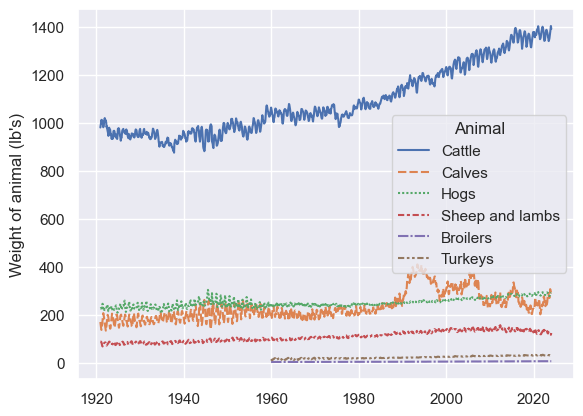

In [9]:
fig, axes = plt.subplots()
ax = sns.lineplot(us_weight_data['Federally inspected average live'])
ax.set_ylabel("Weight of animal (lb's)")

animal_list = us_weight_data['Federally inspected average live'].columns

Index(['Cattle', 'Calves', 'Hogs', 'Sheep and lambs', 'Broilers', 'Turkeys'], dtype='object', name='Animal')


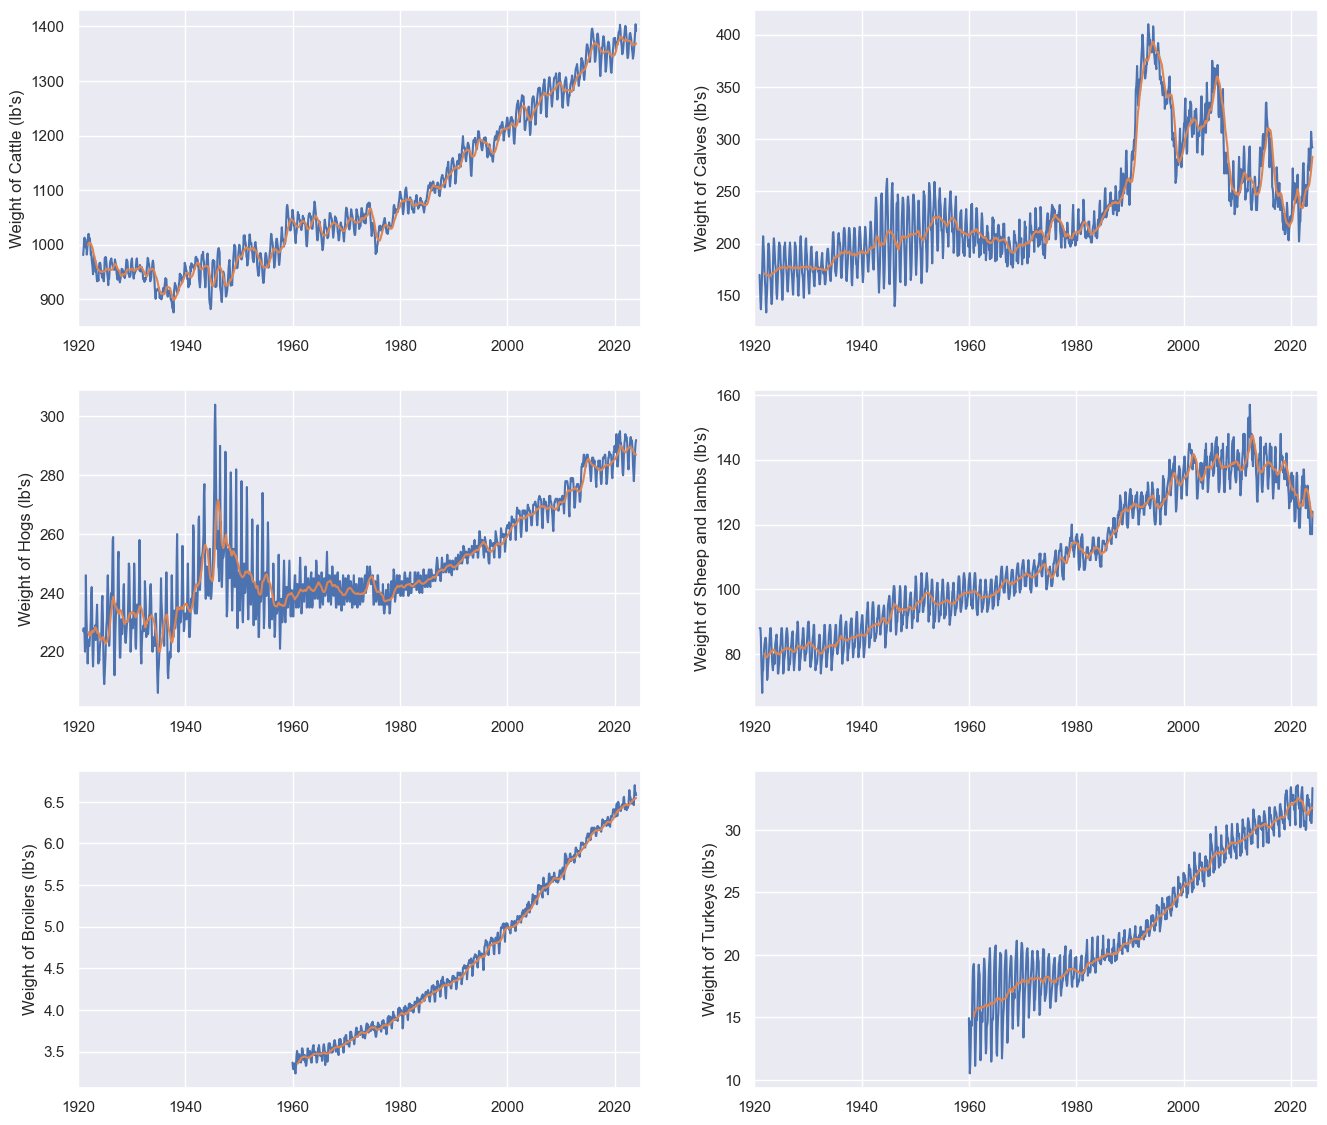

In [10]:
fig, axes = plt.subplots(math.ceil(len(animal_list)/2), 2, figsize=(16,14))
print(us_weight_data['Federally inspected average live'].columns)
live_weights_rolling_avg = us_weight_data['Federally inspected average live'].rolling(window=12).mean()
for idx, animal in enumerate(animal_list):
    ax = sns.lineplot(us_weight_data['Federally inspected average live'][animal], ax=axes[idx//2, idx%2])
    sns.lineplot(live_weights_rolling_avg[animal], ax=axes[idx//2, idx%2])
    ax.set_ylabel(f"Weight of {animal} (lb's)")
    ax.set_xlim(date.fromisoformat('1920-01-01'), date.fromisoformat('2025-01-01'))

These charts show livestock weights have been increasing since at least the early 1900's and in the case of Cattle and Pigs it really ramped up from around 1980. This corresponds with the rising demand for meat and the uptake of intensive animal agriculture around the middle of the 20th century. Around 1966, the US, UK and other developed countries began large scale factory farming of Cattle and Pigs. Since 1980, the rate of increase of the live weight of Cattle, Hogs, Broilers and Turkeys has stayed roughly constant and shows no signs of slowing down.

[7.60283521]
Between 1980 and 2024 average growth was 7.603 pounds per year
[1.16770404]
Between 1980 and 2024 average growth was 1.168 pounds per year
[0.06336841]
Between 1980 and 2024 average growth was 0.063 pounds per year
[0.34570845]
Between 1980 and 2024 average growth was 0.346 pounds per year


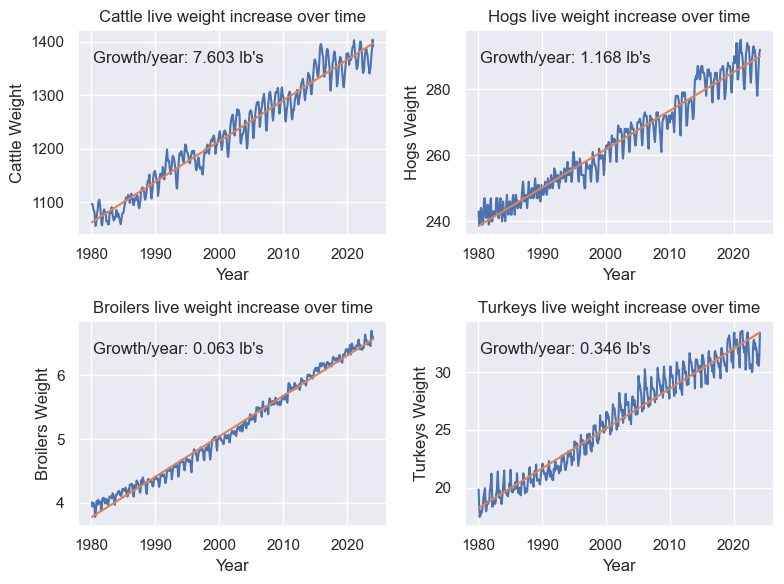

In [11]:

def date_vs_nums_regression_plot(df, title, y_units, axes):
    df = df.dropna()
    first_year = df.index.min().year
    last_year = df.index.max().year
    dates = (df.index.year.astype(int) + df.index.month.astype(int)/12).values
    X = dates.reshape(-1, 1)
    
    y = df.values
    model = LinearRegression()
    model.fit(X, y)

    sns.lineplot(x = dates, y=y, ax=axes)
    print(model.coef_)
    growth = round(model.coef_[0], 3)
    
    y_pred = model.predict(X)
    sns.lineplot(x = dates, y = y_pred, ax=axes)
    axes.set_title(title)
    axes.set_xlabel("Year")
    axes.set_ylabel(f"{df.name} Weight")
    axes.text(0.05, 0.9, f'Growth/year: {growth} lb\'s', ha='left', va='top', transform = axes.transAxes)
    print(f"Between {first_year} and {last_year} average growth was {growth} {y_units} per year")

    return growth
    

animal_list = ["Cattle", "Hogs", "Broilers", "Turkeys"]
fig, axes = plt.subplots(math.ceil(len(animal_list)/2), 2, figsize=(8, 6))
animal_growth_live = {}
for idx, animal in enumerate(animal_list):
    row, col = divmod(idx, 2)
    animal_growth_live[animal] = (date_vs_nums_regression_plot(us_weight_data['Federally inspected average live'][animal][us_weight_data.index >= "1980"],
                                                          f'{animal} live weight increase over time', 'pounds',
                                                          axes[row, col]))
fig.tight_layout() 


[4.9493575]
Between 1980 and 2024 average growth was 4.949 pounds per year
[5.16152]
Between 1980 and 2024 average growth was 5.162 pounds per year
[5.51994183]
Between 1980 and 2024 average growth was 5.52 pounds per year
[3.58755281]
Between 1980 and 2024 average growth was 3.588 pounds per year
[1.12463595]
Between 1980 and 2024 average growth was 1.125 pounds per year


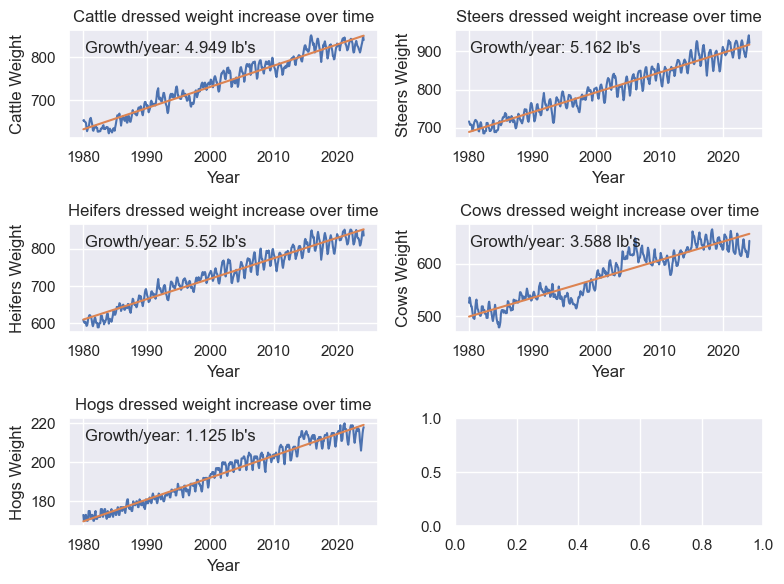

In [12]:
dressed_animal_list = ["Cattle", "Steers", "Heifers", "Cows", "Hogs"]
fig, axes = plt.subplots(math.ceil(len(dressed_animal_list)/2), 2, figsize=(8, 6))
animal_growth_dressed = {}
for idx, animal in enumerate(dressed_animal_list):
    row, col = divmod(idx, 2)
    animal_growth_dressed[animal] = date_vs_nums_regression_plot(us_weight_data['Federally inspected average dressed'][animal][us_weight_data.index >= "1980"],
                                                          f'{animal} dressed weight increase over time', 'pounds',
                                                          axes[row, col])
fig.tight_layout() 

Dressed weight does not directly correspond to edible meat since it includes the bones, cartilage and some other body structure. Taking a conservative estimate of 60% of the dressed weight turning into edible meat, that is approximately 3 more pounds of beef per year per cattle and 0.675 pounds of pork per year per pig. An average steak weighs around 8oz and piece of bacon 1oz. So per year that is around 6 more steaks per cow and 11 more rashers of bacon. From 1980-2024 (44 years) that is 
- 264 more steaks per cow
- 484 more rashers of bacon per pig

(40.0, 80.0)

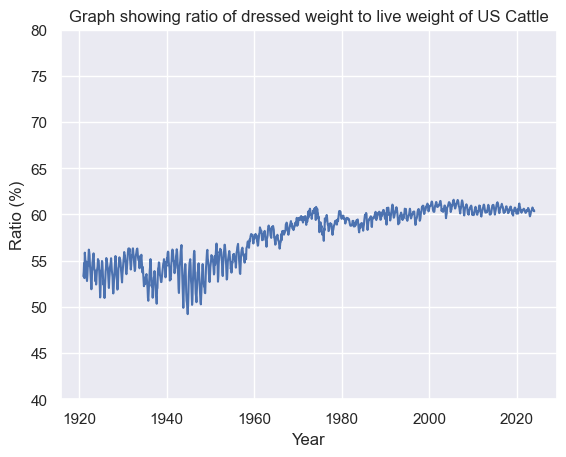

In [13]:
us_weight_data[('Dressed weight ratio', 'Cattle')] = 100 * us_weight_data['Federally inspected average dressed']['Cattle'] / us_weight_data['Federally inspected average live']['Cattle'] 
ax = sns.lineplot(us_weight_data['Dressed weight ratio']['Cattle'])
ax.set_xlabel("Year")
ax.set_ylabel("Ratio (%)")
ax.set_title("Graph showing ratio of dressed weight to live weight of US Cattle")
ax.set_ylim(40,80)

This graph shows that for the last 40 years dressed weight has been around about 60% of the live weight of cows. Increases in this number could be due to physiological changes due to selective breeding and factory farming and industralisation of the meat processing industry.

In [14]:

us_lw_1980 = us_weight_data['Federally inspected average live']['Cattle'][us_weight_data.index >= "1980"]
base_weight = us_lw_1980.iloc[-1]
base_year = us_lw_1980.index.year.astype(int).min() + (us_lw_1980.index.month.astype(int).min()-1)/12
base_year


1980.0

In [15]:
lw_transformed = us_lw_1980[us_lw_1980.index >= "1980"] - \
    animal_growth_live["Cattle"]*(us_lw_1980.index.year.astype(int) + (us_lw_1980.index.month.astype(int)-1)/12 - base_year) 
lw_transformed

1980-01-01    1097.000000
1980-02-01    1096.366417
1980-03-01    1090.732833
1980-04-01    1084.099250
1980-05-01    1081.465667
                 ...     
2023-09-01    1033.002333
2023-10-01    1045.368750
2023-11-01    1056.735167
2023-12-01    1070.101583
2024-01-01    1057.468000
Length: 529, dtype: float64

<Axes: >

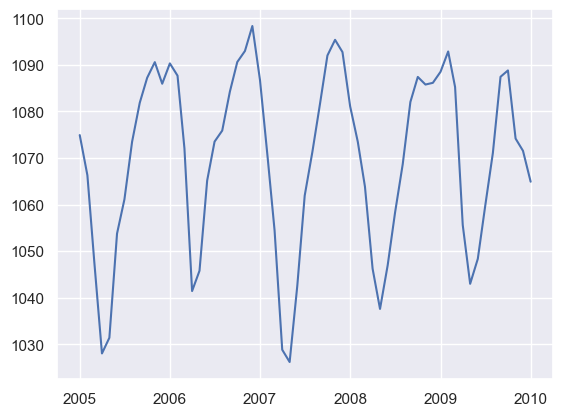

In [16]:
# lw_transformed.sort_index(inplace=True)
sns.lineplot(lw_transformed['2005-01-01':'2010-01-01'])

These look like yearly cycles, with peaks near the end of the year.

In [17]:
cattle_cols = ["Cattle", "Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]
slaughter_count_cattle = us_slaughter_count["Federally inspected"][cattle_cols]
slaughter_count_cattle.index = pd.to_datetime(slaughter_count_cattle.index, format="%b-%Y")
slaughter_count_cattle.sort_index(inplace=True)
slaughter_count_cattle = slaughter_count_cattle['1980':]
slaughter_count_cattle

,Cattle,Steers,Heifers,Beef cows,Dairy cows,Bulls and stags
1980-01-01,2738.7,1444.0,720.0,260.0,260.0,54.0
1980-02-01,2485.7,1333.0,672.0,216.0,216.0,49.0
1980-03-01,2403.0,1303.0,646.0,203.0,203.0,49.0
1980-04-01,2539.5,1373.0,686.0,215.0,215.0,52.0
1980-05-01,2616.4,1392.0,740.0,215.0,216.0,54.0
...,...,...,...,...,...,...
2023-09-01,2559.8,1206.5,788.6,275.8,240.5,48.4
2023-10-01,2767.7,1274.1,870.0,330.7,242.9,50.0
2023-11-01,2681.3,1209.2,856.9,341.0,229.7,44.4
2023-12-01,2548.8,1197.8,797.2,291.9,224.7,37.2


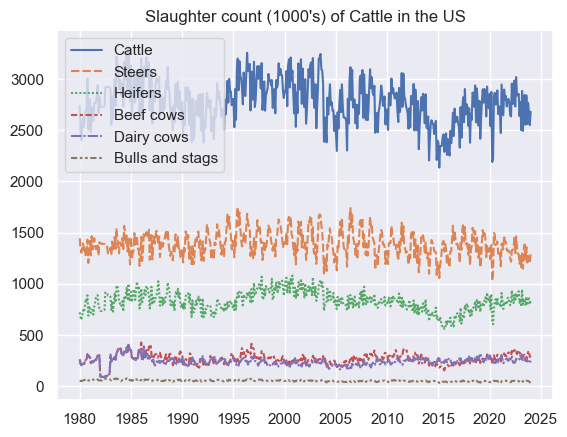

In [18]:
ax = sns.lineplot(slaughter_count_cattle)
ax.set_title("Slaughter count (1000's) of Cattle in the US")

Slaughter count has stayed relatively flat in the last 50 years, but with the increase in yields per animal shown above meat production will have increased.

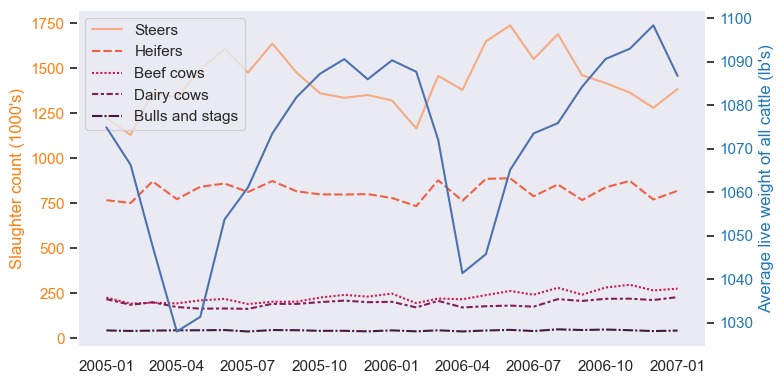

In [19]:
base_cattle_cols = ["Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]
slaughter_base_cattle_3years = slaughter_count_cattle[base_cattle_cols]['2005-01-01':'2007-01-01']
fig, ax1 = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
color = 'tab:orange'
ax1.set_ylabel('Slaughter count (1000\'s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid(None)
palette = sns.color_palette("rocket_r", n_colors=len(base_cattle_cols))
sns.lineplot(slaughter_base_cattle_3years, palette=palette)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average live weight of all cattle (lb\'s)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(None)
sns.lineplot(lw_transformed['2005-01-01':'2007-01-01'], ax=ax2)
fig.tight_layout()


This graph shows as the number of Steers being slaughtered each month decreases, the average live weight of cattle decreases. This is expected since Steers are both the heaviest and the largest in number being slaughtered.

In [20]:
# Average live weight of each animal
laws = us_weight_data['Federally inspected average live']
laws = laws.dropna()
laws

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Turkeys
1960-01-01,1064.0,203.0,236.0,103.0,3.37,14.95
1960-02-01,1056.0,199.0,232.0,104.0,3.30,12.79
1960-03-01,1049.0,187.0,232.0,105.0,3.29,10.53
1960-04-01,1036.0,205.0,239.0,103.0,3.35,11.20
1960-05-01,1033.0,222.0,242.0,99.0,3.36,12.66
...,...,...,...,...,...,...
2023-09-01,1365.0,285.0,281.0,118.0,6.61,31.55
2023-10-01,1378.0,307.0,285.0,118.0,6.70,30.57
2023-11-01,1390.0,300.0,289.0,118.0,6.61,30.55
2023-12-01,1404.0,292.0,291.0,117.0,6.61,31.56


In [21]:
avg_df = laws.groupby(by = lambda x: x.year).mean()
avg_df.index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int64')

In [22]:
year_list = [1960, 1980, 2000, 2020]
compare_df = avg_df[avg_df.index.isin(year_list)]
compare_df

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Turkeys
1960,1032.916667,211.083333,239.083333,99.250000,3.355833,15.055833
1980,1080.000000,214.333333,242.000000,112.333333,3.947500,18.499167
2000,1222.083333,311.833333,262.500000,136.416667,4.999167,25.635000
2020,1376.000000,244.000000,289.000000,129.166667,6.408333,32.272500


In [23]:
small_animals = ["Calves", "Hogs", "Sheep and lambs", "Broilers", "Turkeys"]
g = sns.scatterplot(compare_df[small_animals])
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))
g.set_ylabel("Weight of animal (lb's)")
compare_df[small_animals]

KeyError: "['Other chickens'] not in index"

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1980,1.045583,1.015397,1.012199,1.131822,1.176310,0.893306,1.228704
2000,1.183138,1.477300,1.097944,1.374475,1.489695,1.082739,1.702662
2020,1.332150,1.155942,1.208784,1.301427,1.909610,1.397214,2.143521


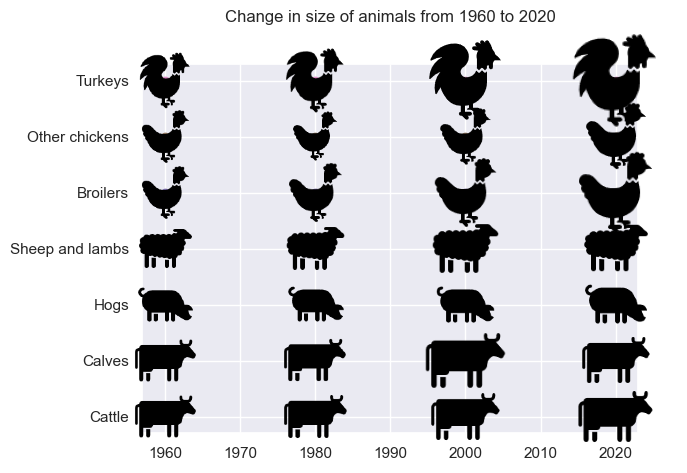

In [ ]:
x = year_list
y_values = compare_df.columns

asset_folder = "assets/"
animal_imgs = ["cow.png", "cow.png", "pig.png", "sheep.png", "chicken.png", "chicken.png", "turkey.png"]

fig, ax = plt.subplots()
ax.set_title("Change in size of animals from 1960 to 2020", pad=30)

for y in y_values:
    ax.scatter(x, [y]*len(x)) 

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(os.path.join(asset_folder, path)), zoom=0.5*zoom**(2/3))

relative_weights_df = compare_df.div(compare_df.loc[1960])

for idx, y in enumerate(y_values):
    for year in x:
        ab = AnnotationBbox(getImage(animal_imgs[idx], zoom=relative_weights_df.at[year, y]), (year, y), frameon=False)
        ax.add_artist(ab)

relative_weights_df

These charts show chickens and turkeys have seen the biggest relative increase in weight since 1960, a doubling in just 60 years. This causes a variety of health problems https://www.rspcaassured.org.uk/farmed-animal-welfare/chickens/fast-growing-chickens/.

Text(0.5, 1.0, 'Relative increase in weight of livestock 1960 - 2020')

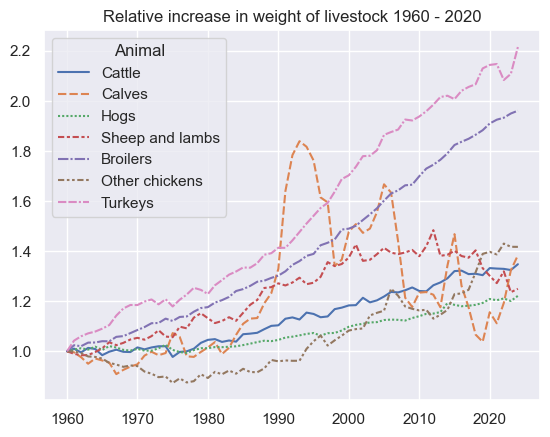

In [ ]:
ax = sns.lineplot(avg_df.div(avg_df.loc[1960]))
ax.set_title("Relative increase in weight of livestock 1960 - 2020")

# Further Questions to Explore
- How has age at slaughter been impacted by selective breeding
- What do livestock weights look like across countries 